# Data Visualization: Plotting with Matplotlib

## Objectives

1. Configure a Jupyter Notebook for inline visualizations with `pyplot`
2. Create `fig` and `ax` objects with `plt.subplots()`
3. Add titles and axis labels to a plot.
4. Visualize data using a scatterplot.
5. Visualize sequential data using a line plot.
6. Visualize data using a bar chart.
7. Explain why data scientists don't use pie charts.
8. Use `pd.scatter_matrix()` for rapid data exploration.

### 1. Configure Jupyter for inline visualizations with `pyplot`

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

### 2. Create `fig` and `ax` objects with `plt.subplots()`

#### 2a. Creating a figure with _one_ set of axes

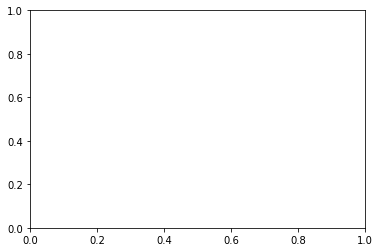

In [2]:
fig, ax = plt.subplots()

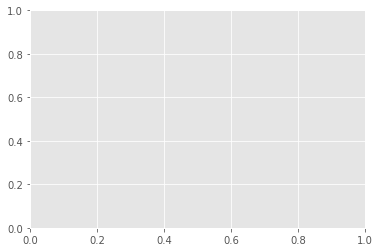

In [3]:
# Apply a style
plt.style.use('ggplot')  # ggplot is the plotting library in R
fig, ax = plt.subplots()

In [4]:
ax.scatter(0.5, 0.5)

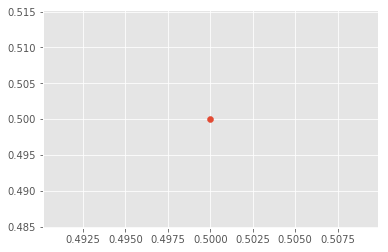

In [5]:
fig

#### 2(b) Creating a figure with _multiple_ axes

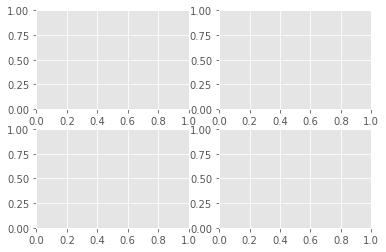

In [6]:
fig, axs = plt.subplots(2, 2)

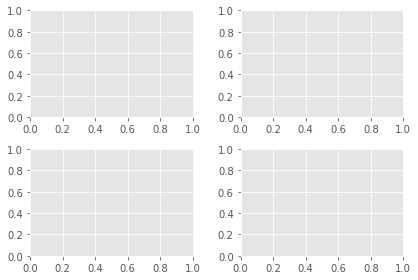

In [7]:
# Fix the ugliness
fig.tight_layout()
fig

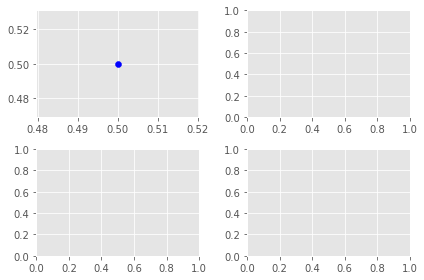

In [8]:
# Referencing one set of axes
ax = axs[0][0]
ax.scatter(0.5, 0.5, color='blue')
fig

In [9]:
# This does the same thing, for the remaining axes
axs[0][1].scatter(0.5, 0.5, color='purple')
axs[1][0].scatter(0.5, 0.5, color='red')
axs[1][1].scatter(0.5, 0.5, color='green')

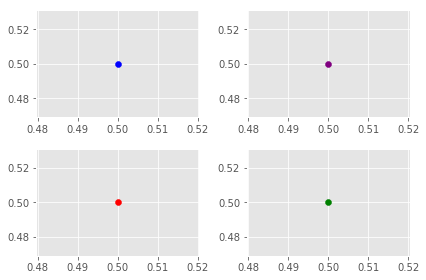

In [10]:
fig

### 3. Add titles and axis labels to a plot

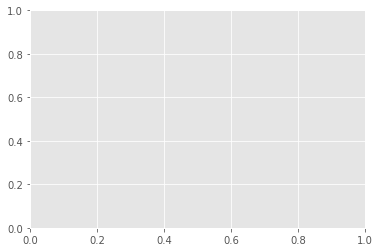

In [11]:
fig, ax = plt.subplots()

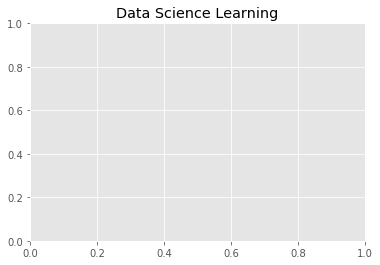

In [12]:
# Label the plot
ax.set_title('Data Science Learning')
fig

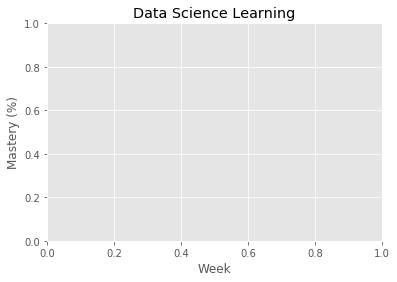

In [13]:
# Label your axes
ax.set_xlabel('Week')
ax.set_ylabel('Mastery (%)')
fig

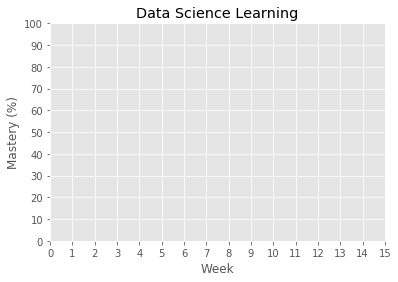

In [16]:
# Set limits
ax.set_xlim(1, 15)
ax.set_ylim(0, 100)
ax.set_yticks(range(0,101,10))
ax.set_xticks(range(0,16,1))
fig

#### 4. Visualize data using a scatterplot.

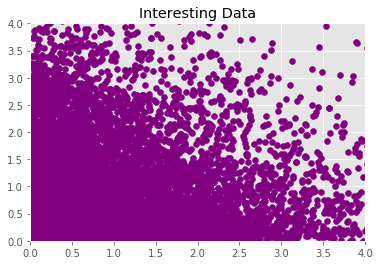

In [17]:
fig, ax = plt.subplots()

# Label plot
ax.set_title('Interesting Data')

# Set limits
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Generate data
exponential_distribution = stats.expon()
x = exponential_distribution.rvs(10000)
y = exponential_distribution.rvs(10000)

# Plot
ax.scatter(x, y, color="purple")

##### What's wrong with the plot above? How is it fixed below?

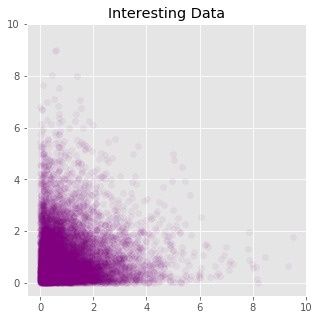

In [19]:
# Set figure size
fig, ax = plt.subplots(figsize=(5, 5))

# Label plot
ax.set_title('Interesting Data')

# Set limits
ax.set_xlim(-.5, 10)
ax.set_ylim(-.5, 10)

# Generate data
exponential_distribution = stats.expon()
x = exponential_distribution.rvs(10000)
y = exponential_distribution.rvs(10000)

# Plot with alpha transparency
ax.scatter(x, y, alpha=.05, color="purple")

#### 5. Visualize sequential data using a line plot.

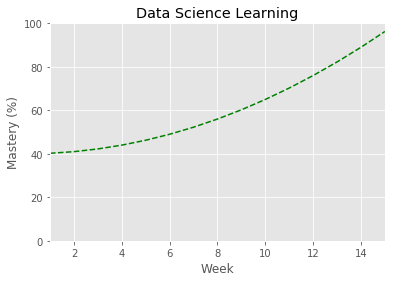

In [21]:
fig, ax = plt.subplots()

# Label plot
ax.set_title('Data Science Learning')

# Label axes
ax.set_xlabel('Week')
ax.set_ylabel('Mastery (%)')

# Set limits
ax.set_xlim(1, 15)
ax.set_ylim(0, 100)

x = np.arange(0, 16)
y = 40 + x**2/4

ax.plot(x, y, linestyle="dashed", color="green")

#### 6. Visualize data using a bar chart.

In [22]:
import pandas as pd

In [30]:
tarantino = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/tarantino/tarantino.csv')


In [31]:
tarantino.columns

Index(['movie', 'type', 'word', 'minutes_in'], dtype='object')

In [35]:
tarantino_words = tarantino[ tarantino['type']=='word']

In [84]:
bad_words = tarantino_words['movie'].value_counts().to_frame().reset_index()
#type(bad_words)

In [85]:
bad_words

,index,movie
0,Pulp Fiction,469
1,Reservoir Dogs,421
2,Jackie Brown,368
3,Django Unchained,262
4,Kill Bill: Vol. 2,69
5,Inglorious Basterds,58
6,Kill Bill: Vol. 1,57


In [86]:
bad_words.columns = ['movie','word_ct']
bad_words

,movie,word_ct
0,Pulp Fiction,469
1,Reservoir Dogs,421
2,Jackie Brown,368
3,Django Unchained,262
4,Kill Bill: Vol. 2,69
5,Inglorious Basterds,58
6,Kill Bill: Vol. 1,57


<BarContainer object of 7 artists>

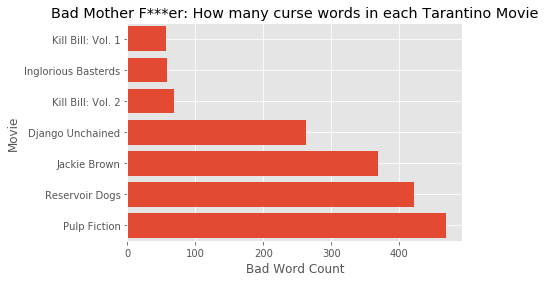

In [92]:
fig, ax = plt.subplots()

# Label plot
ax.set_title('Bad Mother F***er: How many curse words in each Tarantino Movie')

# Label axes
ax.set_ylabel('Movie')
ax.set_xlabel('Bad Word Count')

# Set data
width = bad_words['word_ct']
ylabel = bad_words['movie']
y = np.arange(len(ylabel)) + .5

# Set limits & ticks
ax.set_ylim(0, len(ylabel))
#ax.set_ylim(-2, 10)
ax.set_yticklabels(ylabel)
ax.set_yticks(y)

# Plot
ax.barh(y, width)


In [87]:
ax.barh?

#### 7. Explain why data scientists don't use pie charts.

https://www.businessinsider.com/pie-charts-are-the-worst-2013-6

#### 8. Use `pd.scatter_matrix()` for rapid data exploration.

In [93]:
!ls

80-cereals-nutrition-data-on-80-cereal-products.zip
plotting_with_matplotlib.ipynb


In [96]:
!unzip 80-cereals-nutrition-data-on-80-cereal-products.zip

Archive:  80-cereals-nutrition-data-on-80-cereal-products.zip
  inflating: 80-cereals.zip          


In [98]:
!unzip 80-cereals.zip

Archive:  80-cereals.zip
  inflating: cereal.csv              


In [99]:
cereal = pd.read_csv('cereal.csv')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


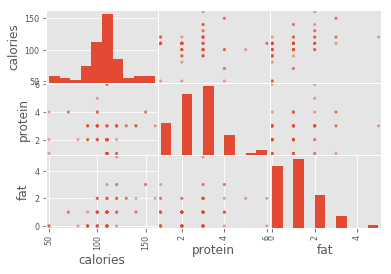

In [101]:
_ = pd.scatter_matrix( cereal[['calories','protein','fat']])